# Pandas: Una poderosa herramienta para análisis de datos

Introducción a Pandas. Romina Cofré. 2018

## Libreria

In [1]:
# Importar libreria pandas con alias pd 
import pandas as pd

La versión de Pandas utilizada, es la 0.23.0

In [2]:
# Version de Pandas que he utilizado
pd.__version__

'0.22.0'

## Estructuras de datos

La estructura de datos que utiliza pandas es un DataFrame

### Creando un Data Frame

In [3]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]});

In [4]:
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


O podemos asignarle una variable que contiene un diccionario con anterioridad.

In [5]:
d = {'col1': [1, 2], 'col2': [3, 4]}

In [6]:
df = pd.DataFrame(data=d)

In [7]:
df

,col1,col2
0,1,3
1,2,4


### Creando una serie de datos

In [8]:
#una lista...
L = [1,2,3,4,1,2,2,2,2,2,2,3]
Series = pd.Series(data=L)

In [9]:
Series

0     1
1     2
2     3
3     4
4     1
5     2
6     2
7     2
8     2
9     2
10    2
11    3
dtype: int64

Una lista es una **serie** en Pandas. A continuación un data frame separado en series.

In [10]:
df = pd.DataFrame(data=d)
for col in df.columns:
    series = df[col]
    print (series)

0    1
1    2
Name: col1, dtype: int64
0    3
1    4
Name: col2, dtype: int64


### Tipos de datos

In [11]:
df.dtypes

col1    int64
col2    int64
dtype: object

## Leyendo datos de archivos

Leer un archivo **Excel**

In [12]:
# Todos los colegios al 20018 - Chile (3,1 MB)
colegios2018file = pd.read_excel('Archivos/Directorio2018.xlsx')
colegios2018 = pd.DataFrame(colegios2018file)

Leer un archivo **CSV**

In [13]:
# registro de Transportes de Pasajeros al Aeropuerto - Chile (4 KB)
transfersfile = pd.read_csv('Archivos/RegistroTransporteDePasajerosAlAeropuerto.csv')
transfers = pd.DataFrame(transfersfile)

Si alguna vez tienen un error, por que en una fila la cantidad de columnas no coinciden, una solución puede ser que el delimitador no está determinado, para ello se puede pasar como paramatero

In [14]:
transfersfile = pd.read_csv('Archivos/RegistroTransporteDePasajerosAlAeropuerto.csv', sep=';')

Leer un archivo **STATA**

In [15]:
# Encuesta Casen 2017 - Chile (2.18 GB)
casen2017file = pd.read_stata('Archivos/Casen2017.dta')

OSError: [Errno 22] Invalid argument

**ERROR!** Al parecer el archivo es muy grande.

### Leer un archivo muy grande

Al leer un archivo como el anterior, un computador de humildes recursos, se quedaría sin memoria, por lo tanto hay que leer el archivo por trozos.

In [16]:
# chunksize > cantidad de rows por lectura

df_iterator = pd.read_stata('Archivos/Casen2017.dta', iterator=True, chunksize=2)

#Luego hay que iterar df_iterator

## Visualización de los datos

Los comandos básicos para entender el conjunto de datos

### Muestras

In [17]:
# Iniciando el Data Frame
df = pd.DataFrame({'AAA' : [4,5,6,7,8,9,10,11,12,13,14,15], 
                   'BBB' : [10,20,30,40,50,60,70,80,90,100,110,120],
                   'CCC' : [100,50,-30,-50,-70, -80,-100,-150,-200,-230,-270,-300]
                  });

In [18]:
# Vemos lo que guardo pandas en la variable df
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50
4,8,50,-70
5,9,60,-80
6,10,70,-100
7,11,80,-150
8,12,90,-200
9,13,100,-230


Para ver los datos, no es recomendable solamente mostrar *df*, ya que si son 1.000.000 de datos, o solo 5.000, tendríamos un caos en la pantalla.　Por consiguiente, tenemos opciones más amigables para ver la información.

Ver el inicio, o el fin de datos.

In [19]:
# los 5 primeros elementos
df.head() 

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50
4,8,50,-70


In [20]:
# los 5 ultimos elementos
df.tail()

,AAA,BBB,CCC
7,11,80,-150
8,12,90,-200
9,13,100,-230
10,14,110,-270
11,15,120,-300


In [21]:
# los 10 primeros elementos
df.head(10)

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50
4,8,50,-70
5,9,60,-80
6,10,70,-100
7,11,80,-150
8,12,90,-200
9,13,100,-230


In [22]:
# los 3 ultimos elementos
df.tail(3)

,AAA,BBB,CCC
9,13,100,-230
10,14,110,-270
11,15,120,-300


In [23]:
# Una muestra aleatoria
df.sample()

,AAA,BBB,CCC
10,14,110,-270


In [24]:
# 10 muestras aleatorias
df.sample(10)

,AAA,BBB,CCC
5,9,60,-80
4,8,50,-70
9,13,100,-230
11,15,120,-300
7,11,80,-150
0,4,10,100
6,10,70,-100
1,5,20,50
10,14,110,-270
2,6,30,-30


### Indices y columnas

In [25]:
# el indice es el numero de la row o el identificador
colegios2018.index

RangeIndex(start=0, stop=16038, step=1)

In [26]:
# nombre de las columnas
colegios2018.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'MRUN', 'RUT_SOSTENEDOR',
       'P_JURIDICA', 'COD_REG_RBD', 'COD_PRO_RBD', 'COD_COM_RBD',
       'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD', 'COD_DEPE',
       'COD_DEPE2', 'RURAL_RBD', 'LATITUD', 'LONGITUD', 'ENS_01', 'ENS_02',
       'ENS_03', 'ENS_04', 'ENS_05', 'ENS_06', 'ENS_07', 'ENS_08', 'ENS_09',
       'MATRICULA', 'ESTADO_ESTAB', 'ORI_RELIGIOSA', 'ORI_OTRO_GLOSA',
       'PAGO_MATRICULA', 'PAGO_MENSUAL'],
      dtype='object')

In [27]:
# muestra
colegios2018.head()

,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,...,ENS_06,ENS_07,ENS_08,ENS_09,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL
0,2018,1,9,LICEO POLITECNICO ARICA,,69010100,1,15,151,15101,...,863,0,0,0,1,1,2,,GRATUITO,GRATUITO
1,2018,2,7,PARVULARIO LAS ESPIGUITAS,,69010100,1,15,151,15101,...,0,0,0,0,1,1,2,,GRATUITO,GRATUITO
2,2018,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,69010100,1,15,151,15101,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
3,2018,4,3,LICEO OCTAVIO PALMA PEREZ,,69010100,1,15,151,15101,...,0,0,0,0,1,1,1,,GRATUITO,GRATUITO
4,2018,5,1,JOVINA NARANJO FERNANDEZ,,69010100,1,15,151,15101,...,0,0,0,0,1,1,7,PLURALISTA,GRATUITO,GRATUITO


## Estadistica básica

Pandas tiene funciones que nos ayudarán a entender el comportamiento de los datos

In [28]:
# un resumen estadistico
df.describe()

,AAA,BBB,CCC
count,12.000000,12.000000,12.000000
mean,9.500000,65.000000,-110.833333
std,3.605551,36.055513,123.616587
min,4.000000,10.000000,-300.000000
25%,6.750000,37.500000,-207.500000
50%,9.500000,65.000000,-90.000000
75%,12.250000,92.500000,-45.000000
max,15.000000,120.000000,100.000000


### Apariciones

In [29]:
# Solamente funciona para una Serie, utilizar un iterador para tener las series, en caso de ser un DataFrame.
Series.value_counts()

2    7
3    2
1    2
4    1
dtype: int64

## Otras funciones matemáticas

Trasponer la matriz de datos

In [30]:
# Trasponer
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
AAA,4,5,6,7,8,9,10,11,12,13,14,15
BBB,10,20,30,40,50,60,70,80,90,100,110,120
CCC,100,50,-30,-50,-70,-80,-100,-150,-200,-230,-270,-300


## Ordenamiento

Ordenar de acuerdo a un eje

In [31]:
df.sort_index(axis=1, ascending=False)

,CCC,BBB,AAA
0,100,10,4
1,50,20,5
2,-30,30,6
3,-50,40,7
4,-70,50,8
5,-80,60,9
6,-100,70,10
7,-150,80,11
8,-200,90,12
9,-230,100,13


Ordenar de acuerdo a una columna

In [32]:
df.sort_values(by='BBB')

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50
4,8,50,-70
5,9,60,-80
6,10,70,-100
7,11,80,-150
8,12,90,-200
9,13,100,-230


## Graficas

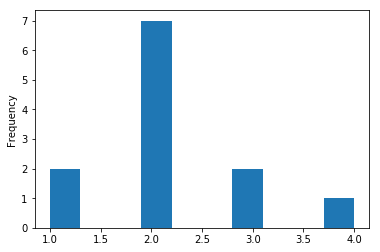

In [34]:
Series.plot(kind='hist') #Ejemplo de histograma basico